# <center>Marking Guide question Six</center>

# Task 1: Mann-Whitney U Test

In [1]:
# Import libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../dataset/non_parametric_tests_data.csv"  # Adjust the path if needed
df = pd.read_csv(data_path)

# Filter data by store
store_a_scores = df[df['Store'] == 'Store A']['Satisfaction_Score']
store_b_scores = df[df['Store'] == 'Store B']['Satisfaction_Score']

# Perform Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(store_a_scores, store_b_scores, alternative='two-sided')

# Print results
print(f"Mann-Whitney U Statistic: {u_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the Null Hypothesis (H₀): There is a significant difference in satisfaction scores between the stores.")
else:
    print("Fail to Reject the Null Hypothesis (H₀): There is no significant difference in satisfaction scores between the stores.")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Store', y='Satisfaction_Score', data=df, palette='Set2')
plt.title('Satisfaction Scores by Store')
plt.ylabel('Satisfaction Score')
plt.xlabel('Store')
plt.grid()
plt.show()


Mann-Whitney U Statistic: 1202.0000
P-Value: 0.8377
Fail to Reject the Null Hypothesis (H₀): There is no significant difference in satisfaction scores between the stores.


# Task 2: Wilcoxon Signed-Rank Test

Wilcoxon Signed-Rank Statistic: 2505.0000
P-Value: 0.9452
Fail to Reject the Null Hypothesis (H₀): There is no significant difference in satisfaction before and after the update.


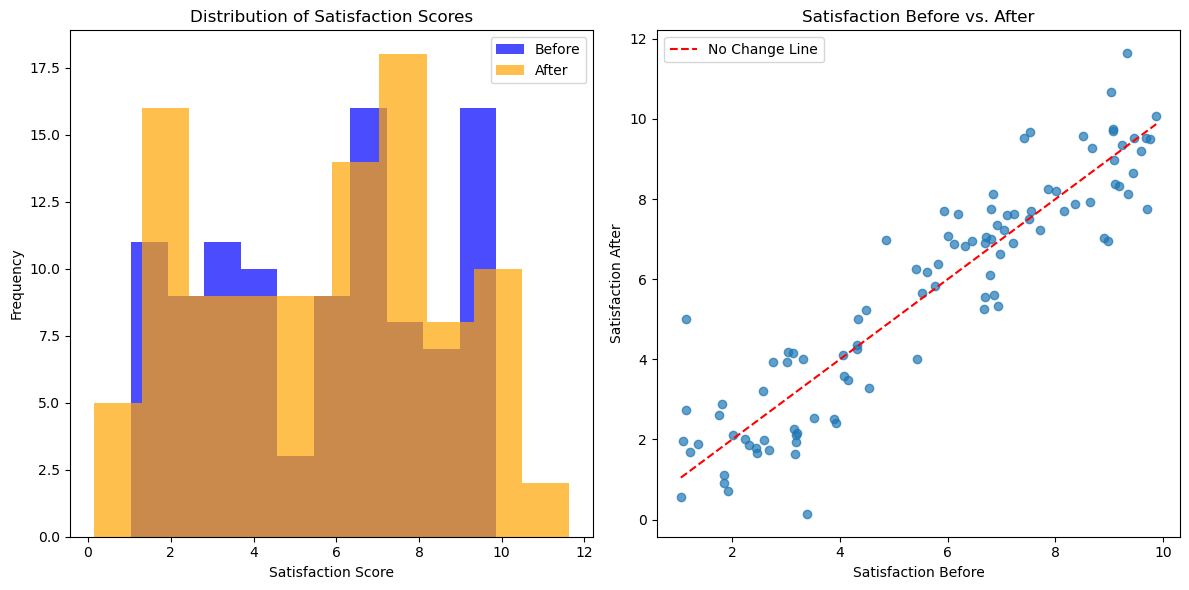

In [2]:
# Extract before and after satisfaction scores
satisfaction_before = df['Satisfaction_Before']
satisfaction_after = df['Satisfaction_After']

# Perform Wilcoxon Signed-Rank Test
stat, p_value = stats.wilcoxon(satisfaction_before, satisfaction_after, alternative='two-sided')

# Print results
print(f"Wilcoxon Signed-Rank Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
if p_value < alpha:
    print("Reject the Null Hypothesis (H₀): There is a significant difference in satisfaction before and after the update.")
else:
    print("Fail to Reject the Null Hypothesis (H₀): There is no significant difference in satisfaction before and after the update.")

# Visualization
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(satisfaction_before, alpha=0.7, label='Before', color='blue')
plt.hist(satisfaction_after, alpha=0.7, label='After', color='orange')
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.legend()

# Paired Plot
plt.subplot(1, 2, 2)
plt.plot(satisfaction_before, satisfaction_after, 'o', alpha=0.7)
plt.plot([min(satisfaction_before), max(satisfaction_before)],
         [min(satisfaction_before), max(satisfaction_before)], 'r--', label='No Change Line')
plt.title('Satisfaction Before vs. After')
plt.xlabel('Satisfaction Before')
plt.ylabel('Satisfaction After')
plt.legend()

plt.tight_layout()
plt.show()
